<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Creating an LLM to find sustainable solutions</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Jort Akershoek</td>
                <td style="border: 0;">JortAkershoek</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top:20px;">
    <img src="https://static.vecteezy.com/system/resources/previews/017/306/579/original/esg-sustainability-concept-illustration-vector.jpg" alt="genres" style="width: 600px; height: auto;">
</div>

- Client: Mathis Mourey 
- Instructors: Mirabai Vosteen and Beata Skuczynska
- Date: ..-..-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Table of contents </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: The Project</a></li>
    <li style="text-align: center;"><a href="#1.0">Chapter 2: Loading Packages, Self-defined functions and the Data</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 3: Exploratory Data Analysis</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 4: Data Preprocessing</a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 5: </a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 6: </a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 7: </a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 8: Results and Conclusions</a></li>
    <li style="text-align: center;"><a href="#8.0">Chapter 9: Sources</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: The Project </strong></h2>

</ul>

In this project, we focus on improving the accessibility of policy information related to the energy transition. Governments across Europe and the Netherlands publish numerous policy documents, regulations, and reports to support the shift toward renewable energy sources. These documents are often technical, extensive, and written in academic or legal language, making it difficult for citizens to understand their content. As a result, they miss out on important information about subsidies, regulations, or their own role in the energy transition.

To address this problem, we are developing a chatbot powered by a Large Language Model (LLM). This chatbot is capable of automatically analyzing, summarizing, and translating government documents into plain and understandable language. Users can ask questions through a simple interface, and the chatbot provides clear answers based on factual information.

Our approach consists of collecting policy documents in PDF format, preprocessing the texts using NLP techniques such as tokenization and filtering, and leveraging a powerful pretrained LLM for text processing. Instead of training a model from scratch, we utilize a pretrained model and Retrieval-Augmented Generation (RAG) to generate relevant answers. The generated responses are evaluated based on their clarity, relevance, and reliability.

With this tool, we aim to contribute to a better-informed society in which citizens have easy access to simplified yet essential information. In doing so, we not only increase public engagement in the energy transition, but also strengthen support for sustainable policy.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Loading Packages, Self-defined functions and the Data</strong></h2>

</ul>

**Packages**

- This section of the notebook covers the necessary Python packages required for our deep learning models. Below is a list of the key packages used

In [ ]:
import os
import pandas as pd
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import json
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation, PCA
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import faiss
from sentence_transformers import SentenceTransformer

**Self defined functions**

- This section contains our self defined functions that are essential for our project. These functions are written to streamline repetitive tasks and enhance code readability.

In [2]:
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

**Loading the text from the PDF files**

- Here we load the text from the different PDF files into text format.

In [3]:
pdf_dir = os.path.join("..", "Training_set_text", "European_policies")

data = []
for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        text = extract_text_from_pdf(file_path)
        if text:
            data.append({"file_name": file_name, "text": text})

df = pd.DataFrame(data)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Exploratory Data Analysis </strong></h2>
</div>

**Basic information**

- In this section, we

In [4]:
print("Number of PDF files processed:", len(df))
print("Sample data:")
print(df.head())

Number of PDF files processed: 9
Sample data:
                                           file_name  \
0                        CELEX_32018L2001_EN_TXT.pdf   
1                        CELEX_32019L0944_EN_TXT.pdf   
2                        CELEX_32023L1791_EN_TXT.pdf   
3                        CELEX_32023R0955_EN_TXT.pdf   
4  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   

                                                text  
0  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...  
1  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...  
2  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...  
3  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...  
4   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  


**Text lengths**

- In this section, we

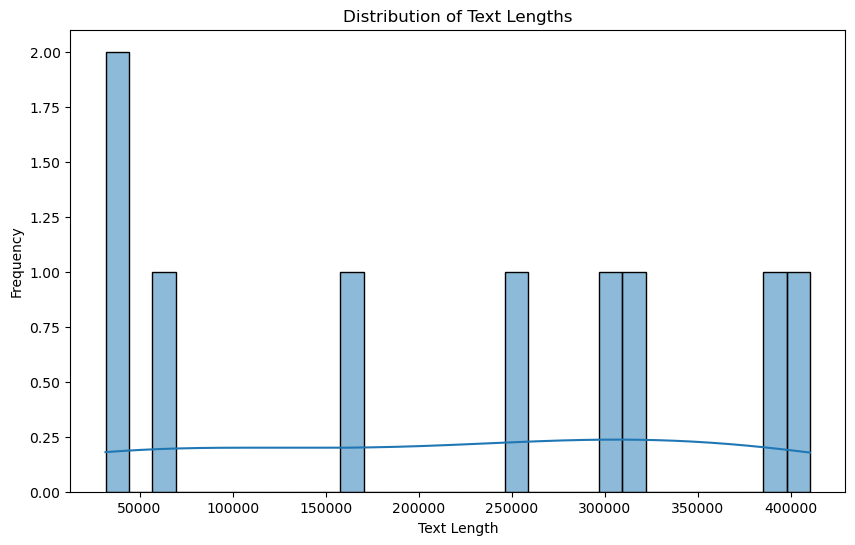

In [5]:
# Add column for text length
df['text_length'] = df['text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

**Word cloud**

- In this section, we

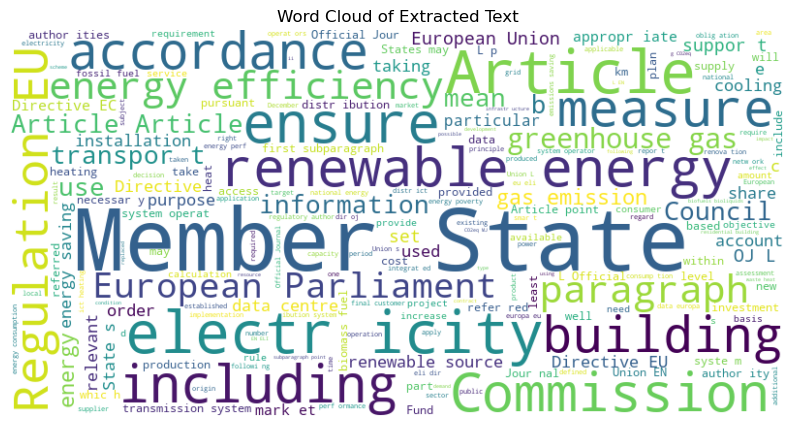

In [6]:
# Generate a word cloud for the combined text
all_text = " ".join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Extracted Text")
plt.show()

**Stop words**

- In this section, we

In [7]:
# Download de stopwoorden als dit nog niet is gedaan
nltk.download('stopwords')

# Stopwoorden ophalen
stop_words = set(stopwords.words('english')) 

# Functie om het aantal stopwoorden in een tekst te tellen
def count_stopwords(text):
    words = text.split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

# word_count toevoegen
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Voeg een nieuwe kolom toe aan de DataFrame met het aantal stopwoorden per bestand
df['stopword_count'] = df['text'].apply(count_stopwords)

# word_count toevoegen
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# stopwoord percentage toevoegen
df['stopword_percentage'] = df['stopword_count'] / df['word_count'] * 100

display(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


file_name  \
0                        CELEX_32018L2001_EN_TXT.pdf   
1                        CELEX_32019L0944_EN_TXT.pdf   
2                        CELEX_32023L1791_EN_TXT.pdf   
3                        CELEX_32023R0955_EN_TXT.pdf   
4  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   
5  cellar_fc930f14-d7ae-11ec-a95f-01aa75ed71a1.00...   
6                          OJ_L_202302413_EN_TXT.pdf   
7                          OJ_L_202401275_EN_TXT.pdf   
8                          OJ_L_202401364_EN_TXT.pdf   

                                                text  text_length  word_count  \
0  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...       410355       69423   
1  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...       297304       48925   
2  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...       388256       58299   
3  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...       168580       27183   
4   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        31713        4902   
5   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        61198        9221   
6  ELI: http://data.europa.eu/eli/dir/2023/2413/o...       317288       51603   
7  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...       249066       39342   
8  COMMISSION DELEGATED REGUL ATION (EU) 2024/136...        40383        6181   

   stopword_count  stopword_percentage  
0           22054            31.767570  
1           17671            36.118549  
2           20570            35.283624  
3           10081            37.085679  
4            1693            34.536924  
5            3253            35.278169  
6           18475            35.802182  
7           13103            33.305373  
8            2135            34.541336

Text(0, 0.5, 'Stopwoord percentage')

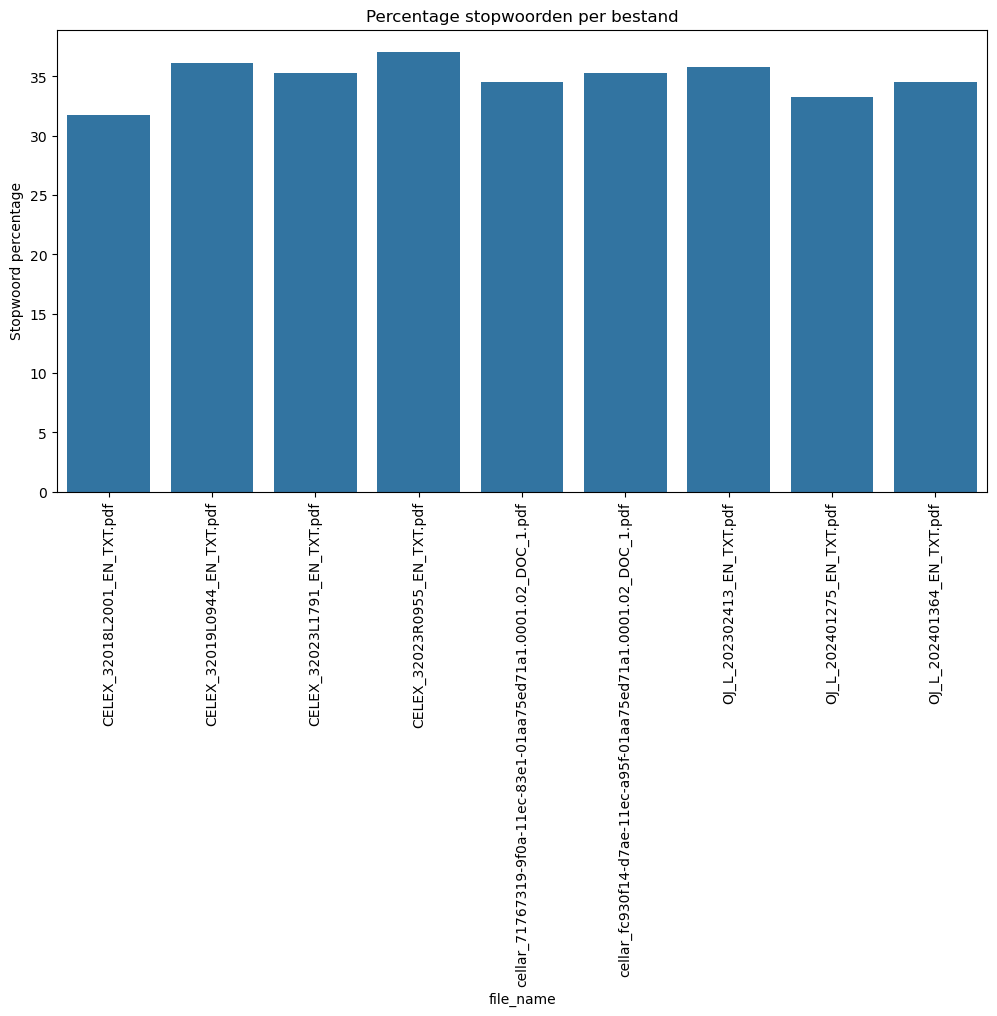

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='file_name', y='stopword_percentage', data=df)
plt.xticks(rotation=90)
plt.title('Percentage stopwoorden per bestand')
plt.ylabel('Stopwoord percentage')

**Stop words for each PDF file**

- In this section, we


**Topic Modeling with Latent Dirichlet Allocation (LDA)**

In deze sectie passen we LDA toe om verborgen thema’s in de PDF‑teksten bloot te leggen.

**Workflow**

1. Een document‑term matrix maken met `CountVectorizer`.  
2. Een `LatentDirichletAllocation`‑model trainen (standaard **5 topics**).  
3. De top‑woorden per topic tonen.  
4. Per topic een horizontale barplot genereren van de 10 belangrijkste woorden.

*(Deze stap sluit de EDA af: na basisstatistieken ➜ woord‑distributies ➜ nu een hoger‑niveau clusteroverzicht.)*


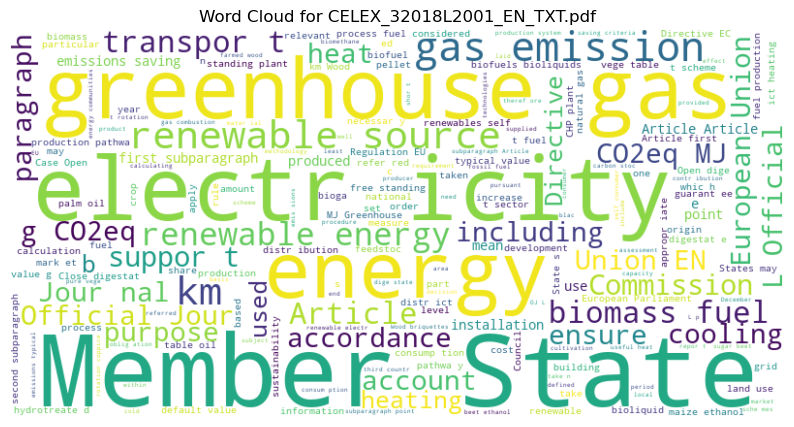

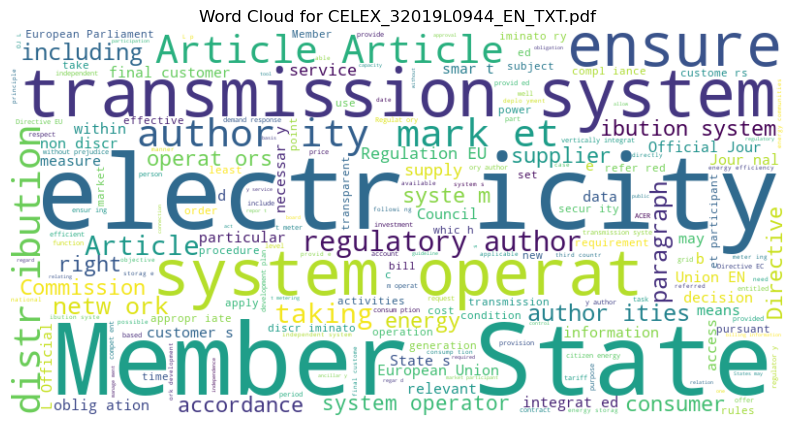

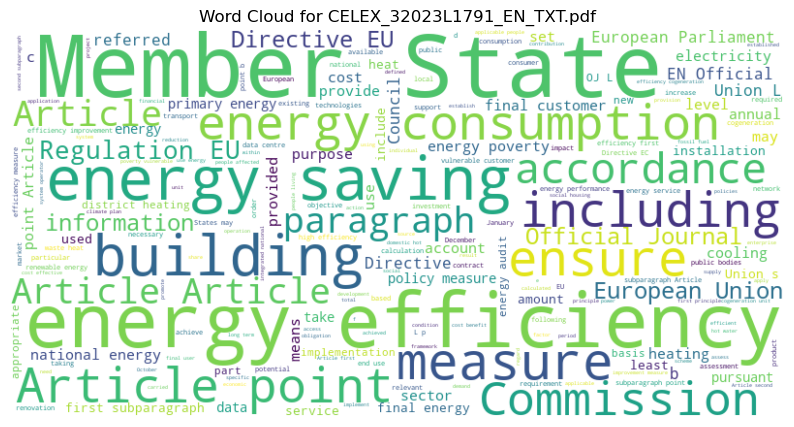

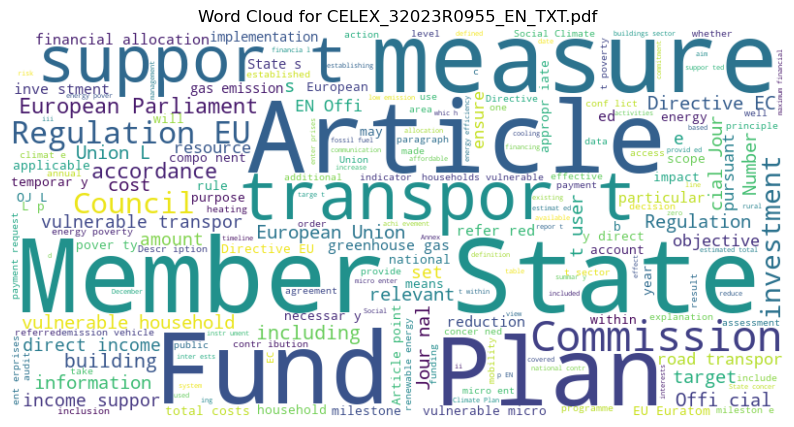

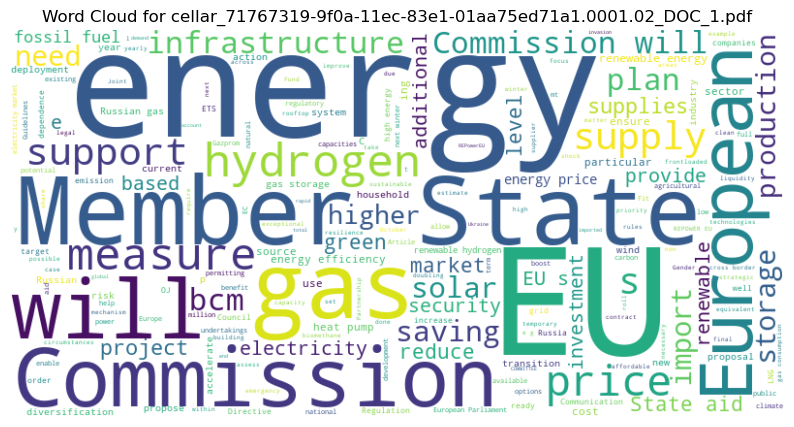

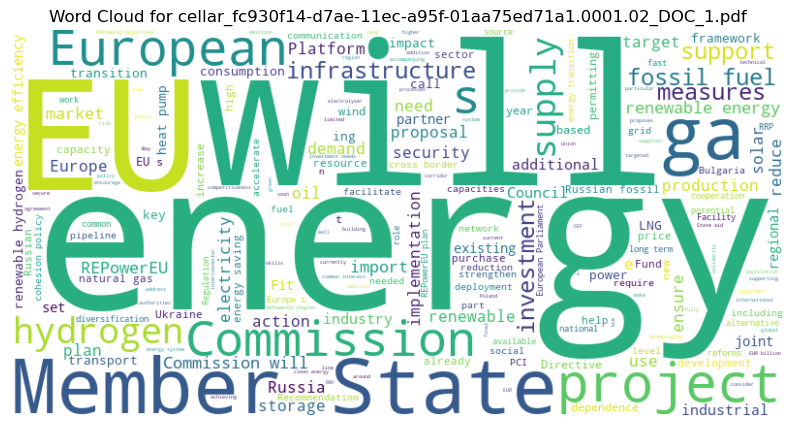

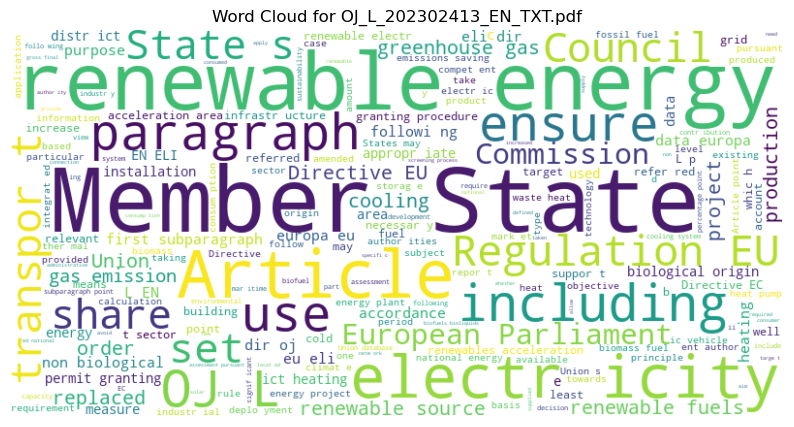

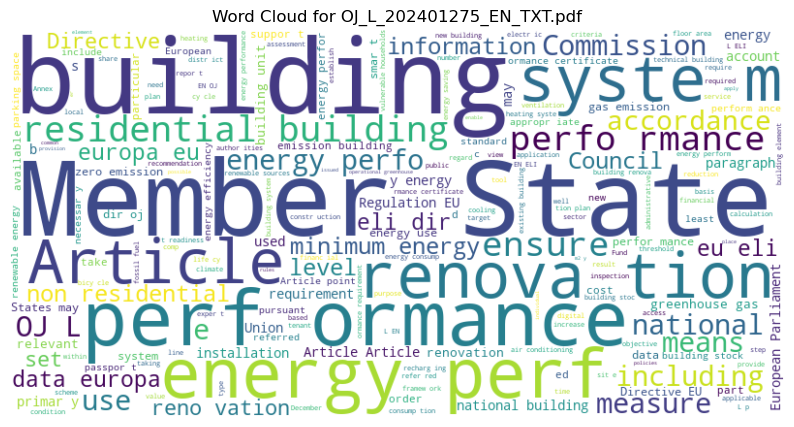

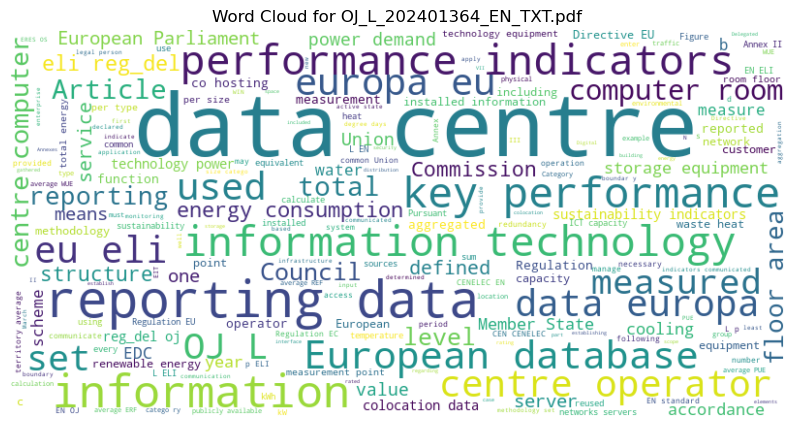

In [9]:
for index, row in df.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(row['text'])
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {row['file_name']}")
    plt.show()

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Data Preprocessing </strong></h2>
</div>

We slaan onze DataFrame, dit doen we voor later gebruik

In [10]:
# Save the processed data for LLM input
output_path = "processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data.csv


We verwijderen rare tekens en whitespaces. Veel beleidsdocumenten bevatten rare tekens of opmaak. Opschonen maakt de input beter voor chunking en embeddings. 
Daarna splitsen lange tekst op in kleinere stukken tekst (chunks) van maximaal max_tokens tokens, zodat ze in een LLM passen.
Veel LLM's. Chunking zorgt ervoor dat we binnen die limiet blijven.

Blog, D. C. (2025, February 27). 5 Approaches to solve LLM token Limits | DeepChecks. Deepchecks. https://www.deepchecks.com/5-approaches-to-solve-llm-token-limits/

In [11]:
import re
def clean_text(text):
    # Remove extra whitespace, newlines, and special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'[^\w\s.,!?]', '', text)  # Remove special characters except punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

def chunk_text(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks

We laden een tokenizer (GPT-2 in dit geval) en stelt het maximum tokens per chunk in.

In [12]:
from transformers import AutoTokenizer
tokenizer_name = "gpt2"  # Replace with your model's tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
max_tokens = 512

d:\Coding\Anaconda\envs\DataScience\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We passen `clean_text` en `chunk_text` toe op elke rij in df.

Daarna slaan we alle chunks op in JSONL formaat. elke regel is 1 sample (chunk).

In [17]:
data =[]
for i, row in df.iterrows():
    text = row['text']
    text = clean_text(text)
    chunks = chunk_text(text, max_tokens, tokenizer)
    for i, chunk in enumerate(chunks):
        data.append({'file_name': row['file_name'], 'chunk_id': i, 'text': chunk})
        
if 'clean_text' not in df.columns:
    df['clean_text'] = df['text'].apply(clean_text) 

df_processed = pd.DataFrame(data)
output_path = "processed_data_chunks.json"
df_processed.to_json(output_path, orient='records', lines=True)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data_chunks.json



Topic 1: data, centre, gas, hydrogen, centres, reporting, supply, repowereu, projects, infrastructure

Topic 2: fund, suppor, transpor, vulnerable, plan, households, financial, investments, accordance, costs

Topic 3: buildings, tion, ormance, perf, renova, syste, requirements, means, heating, minimum

Topic 4: savings, consumption, heating, buildings, cooling, accordance, cogeneration, customers, electricity, official

Topic 5: electr, icity, gas, emissions, distr, greenhouse, biomass, operat, transmission, production


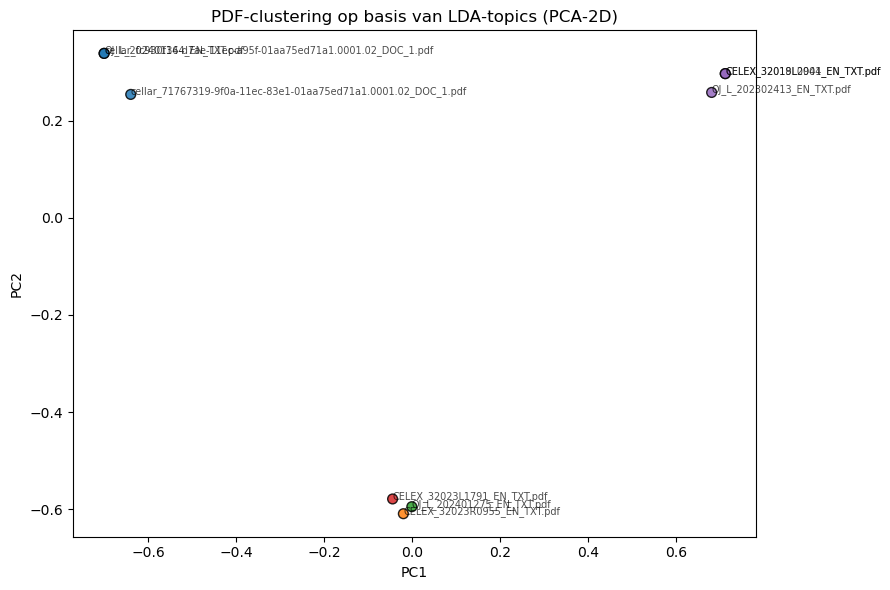

In [ ]:
custom_stop = {
    'shall', 'article', 'oj', 'ed',
    'author', 'paragraph', 'subparagraph', 'referred'}

stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop))

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
doc_term_matrix = vectorizer.fit_transform(df['clean_text'])   

n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method='batch'
).fit(doc_term_matrix)

def show_topics(model, fnames, topn=10):
    for i, comp in enumerate(model.components_):
        terms = ", ".join(fnames[j] for j in comp.argsort()[-topn:][::-1])
        print(f"\nTopic {i+1}: {terms}")

feature_names = vectorizer.get_feature_names_out()
show_topics(lda, feature_names)

doc_topics = lda.transform(doc_term_matrix)
coords = PCA(n_components=2, random_state=42).fit_transform(doc_topics)

dom_topic = doc_topics.argmax(axis=1)
colors = plt.cm.tab10(dom_topic)

plt.figure(figsize=(9, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=colors, s=50, alpha=0.85, edgecolors="k")

for i, fname in enumerate(df['file_name']):
    plt.annotate(fname, (coords[i, 0], coords[i, 1]), fontsize=7, alpha=0.7)

plt.title("PDF‑clustering op basis van LDA‑topics (PCA‑2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()

Hier openen wij de chunks als df.

In [ ]:
df_chunks = pd.read_json("processed_data_chunks.json", lines=True)

print(df_chunks.head())

                     file_name  chunk_id  \
0  CELEX_32018L2001_EN_TXT.pdf         0   
1  CELEX_32018L2001_EN_TXT.pdf         1   
2  CELEX_32018L2001_EN_TXT.pdf         2   
3  CELEX_32018L2001_EN_TXT.pdf         3   
4  CELEX_32018L2001_EN_TXT.pdf         4   

                                                text  
0  DIRECTIVES DIRECTIVE EU 20182001 OF THE EUR OP...  
1   as technological and industr ial leadership w...  
2   energy policies  and of 23 June 2016 entitled...  
3   period in time where the gap occur red. Both ...  
4   clean technologies, and establish an adequate...  


We maken een lijst chunks van alleen de tekstinhoud uit elk JSON-object. Dit is simpel en snel bruikbaar voor embeddings.

In [ ]:
with open("processed_data_chunks.json", "r") as f:
    chunks_data = [json.loads(line) for line in f]

chunks = [items['text'] for items in chunks_data]

We maken embeddings van je chunks met een klein, krachtig model.

**Waarom MiniLM?**

Klein → draait op CPU of laptop

Snel → goed genoeg voor prototyping

sentence-transformers/all-MiniLM-L6-v2 · Hugging Face. (2024, January 5). https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [ ]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
chunks_embeddings = embedding_model.encode(chunks, show_progress_bar=True)

Batches: 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]


**Wat doet het?**

Initieert een FAISS index voor snelle vectorzoekacties

Voegt chunk-embeddings toe aan de index

**Waarom?**
FAISS maakt het mogelijk om in real-time relevante chunks op te halen voor RAG.

In [ ]:
embedding_dim = chunks_embeddings[0].shape[0]
index = faiss.IndexFlatL2(embedding_dim)
index.add(np.array(chunks_embeddings).astype('float32'))

**Wat doet het?**

1. Embed je vraag

2. Zoek de top 5 meest vergelijkbare chunks

3. Combineert ze tot context voor je LLM

**Waarom?**
Door de LLM alleen relevante context te geven, geef je betere antwoorden op vragen.

**Waarom top_k = 5?**
Evenwicht tussen voldoende context en niet te veel tokens. Kun je tunen

In [ ]:
user_question = "What is the green deal"
question_embedding = embedding_model.encode([user_question])

In [ ]:
top_k = 5
_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]
context = "\n\n".join(retreived_chunks)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 5: Modelling </strong></h2>
</div>

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", device_map="auto", torch_dtype="auto")
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [ ]:
user_question = "What does the green deal mean for eu citizens?"
question_embedding = embedding_model.encode([user_question])

_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]

context = "\n\n".join(retreived_chunks)

rag_prompt = f"""
you're an expert in european policy.
you have access to the following context:
{context}
your question is: {user_question}
answer in detail. 
"""

rag_input = tokenizer(rag_prompt, return_tensors="pt")
output = model.generate(**rag_input, num_return_sequences=1)

response = tokenizer.decode(output[0], skip_special_tokens=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (2415 > 512). Running this sequence through the model will result in indexing errors
c:\Users\Nima\anaconda3\Lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
print("Response:", response)

Response: The green transition to a renewable energy based economy will help to achieve the objectives of Decision


In [ ]:

from transformers import (
     AutoTokenizer,
     AutoModelForCausalLM
)
from accelerate import init_empty_weights, load_checkpoint_and_dispatch

model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        torch_dtype="auto",
        low_cpu_mem_usage=True,
)
model.eval()

def generate_chat_response(chat_history, user_input, max_new_tokens=256):
     """
     chat_history: list of (speaker, text) tuples
     user_input: string containing the user’s new query
     """
     chat_history.append(("User", user_input))

     prompt_text = ""
     for role, text in chat_history:
          prompt_text += f"{role}: {text}\n"

     inputs = tokenizer(prompt_text, return_tensors="pt").to("cuda")

     output_ids = model.generate(
          **inputs,
          max_new_tokens=max_new_tokens,
          do_sample=True,        
          top_p=0.9,              
          temperature=0.7,        
          pad_token_id=tokenizer.eos_token_id)

     full_output = tokenizer.decode(output_ids[0], skip_special_tokens=True)

     split_responses = full_output.split("Assistant: ")
     if len(split_responses) > 1:
          assistant_reply = split_responses[-1].strip()
     else:
          assistant_reply = full_output

     chat_history.append(("Assistant", assistant_reply))
     return assistant_reply


def chat_loop():
     chat_history = []
     print("Chatbot ready! Type 'exit' to quit.\n")

     while True:
          user_input = input("User: ")
          if user_input.strip().lower() == "exit":
                print("Exiting chat.")
                break
          
          response = generate_chat_response(chat_history, user_input)
          print(f"Assistant: {response}\n")

chat_loop()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.


Chatbot ready! Type 'exit' to quit.



c:\Users\akers\miniconda3\envs\tf2\lib\site-packages\transformers\generation\utils.py:2345: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cuda, whereas the model is on cpu. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cpu') before running `.generate()`.
  warnings.warn(
